# Breast Cancer Detection

Breast cancer is the most common cancer in the world today. Currently, the average risk of a woman developing breast cancer sometime in her life is about 12%. This means there is a 1 in 8 chance she will develop breast cancer. The American Cancer Society's estimates for breast cancer in the United States for 2019 are: 
- About 268,600 new cases of invasive breast cancer will be diagnosed in women. 
- About 62,930 new cases of carcinoma in situ (CIS) will be diagnosed (CIS is non-invasive and is the earliest form of breast cancer). 
- About 41,760 women will die from breast cancer.

An early diagnosis of Breast Cancer can improve the chances of survival, as it can result in an early mediacal treatment to patient. The Aim of this project is to develop a machine learning model which can do an accurate classification of tumors as benign or mailgn which can suggest patient <b> whether to go through or prevent from undergoing treatments. </b>

Can we classify the tumors by doing a analysis on a dataset provided by UCI?

## Import necessary liabraries

In [3]:
import numpy as np 
import pandas as pd
import sklearn  # for machine learning packages
import matplotlib  # for plotting 
import sys

from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

## Data Description

The dataset used for this project is the breast-cancer-wisconsin data. This data is made available by UC Irvine Machine Learning Repository and it can be found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) and is ready to use. The data contains info about various indicators of tumor. 

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_cromatin','normal_nucleoli','mitoses', 'class']
df = pd.read_csv(url, names=names)
df.to_csv("breast_cancer_wisconsin.csv")

Below are the first five rows of above dataset.

In [5]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Preprocess the data

In [6]:
# check for the blank/missing values in the Dataframe
var1='?'
df[df.eq(var1).any(1)]
#df.loc[df['uniform_cell_size'] == '?']

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [7]:
 #replace the missing data with "-99999" (it tells complier to ignore the data).
 df.replace('?',-99999,inplace=True)

In [8]:
# Test if still any missing data is not addressed.
var1='?'
df[df.eq(var1).any(1)]

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses,class


In [9]:
# Print all the columns
print(df.columns)
# Print the shape
print(df.shape)

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_cromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')
(699, 11)


In [10]:
# Drop the id, since we are not drawing any inferences out of this column
df.drop(["id"], 1, inplace=True)
df.shape

(699, 10)

In [11]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [12]:
df.shape

(699, 10)

### class column has only two value, 2 for benign and 4 for malign

In [13]:
# Data description
# Lets understand the statistical ditribution of the data
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_cromatin  \
count         699.000000              699.000000      699.000000   
mean            2.806867                3.216023        3.437768   
std             2.855379                2.214300        2.438364   
min             1.000000                1.000000        1.000000   
25%             1.000000                2.000000        2.000000   
50%   

<b> Inferences from the above statistical data </b>
    - The mean of class column is close to 2, hence many people the dataset are binign.
    - The max value is 10, hence missing values have been ignored.

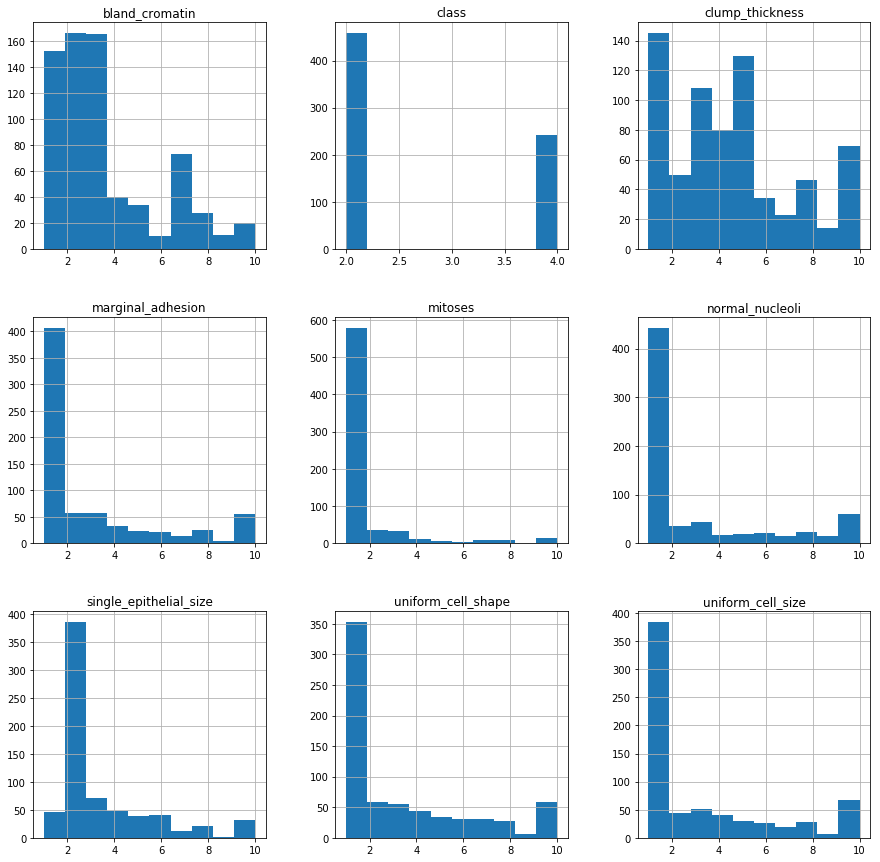

In [14]:
# plot histogram
df.hist(figsize=(15,15))
plt.show()

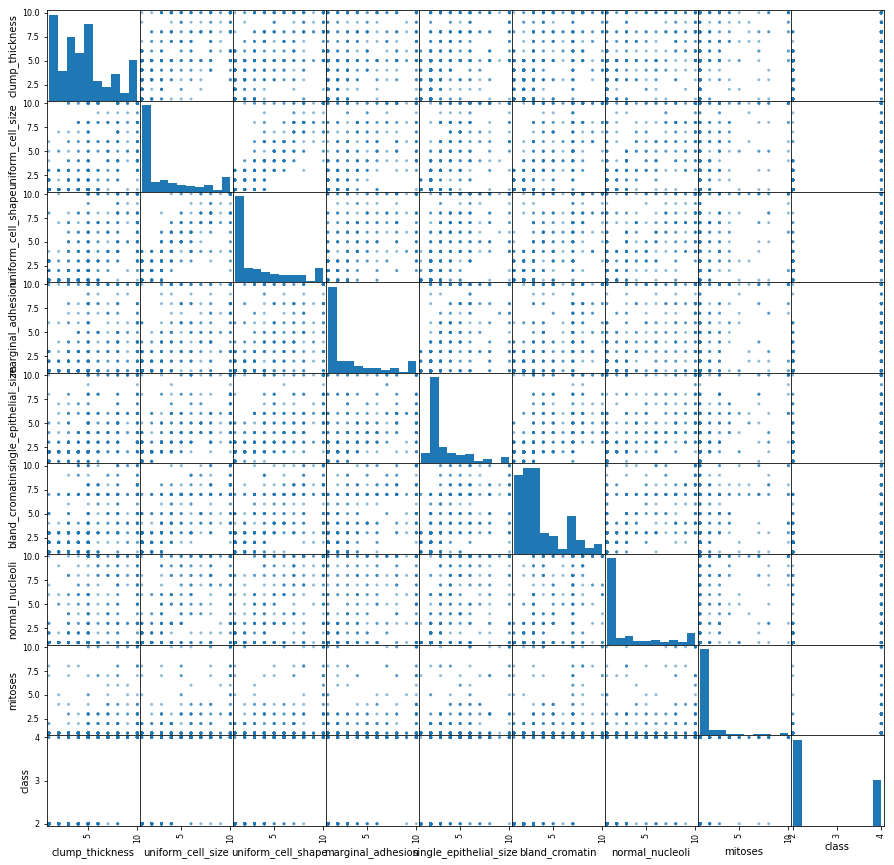

In [15]:
scatter_matrix(df, figsize=(15,15))
plt.show()

The above scatar matrix shows relationship of every variable with other variables. Like -
-  Uniform_cell_size and uniform_cell_shapeand has a strong linear relationship
-  Not any other variables has strong linear relationship
-  One intresting observation other variables does not clearly classifies the class variable, a uniform_cell_size of 1 malign and uniform_cell_size of 10 is also malign. Hence there is not good way to classify it. 


### Split the data between train and test set

In [16]:
X = np.array(df.drop(['class'],1)) # All the features except class is training set
Y = np.array(df['class']) # Class colums is the labled data

# Spilit the data between train and test in the ratio 80% and 20% respectively.
X_train, X_test, Y_train, Y_test= cross_validation.train_test_split(X, Y, test_size=0.2) 


In [17]:
seed = 8
scoring = 'accuracy'

In [18]:
# Define models, I have choosen two ml models KNN and SVM for the classification.
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5))) 
models.append(('SVM', SVC()))

results = [] #results of the ml models will be store here.
names = [] # used to store the model names

#loop in through models and apply it on the data
for name, model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed) # kfold runs a number of time and chooses the best result
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring) # computes the cross validation results
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.965974 (0.023298)
SVM: 0.946266 (0.033106)


In [19]:
# Fit the data/Train the model

for name, model in models:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)  # predict the label for the the test data
    print(name)
    print(accuracy_score(Y_test,predictions))  # Check the accuracy of the model in test data  
    print(classification_report(Y_test,predictions))


KNN
0.9928571428571429
             precision    recall  f1-score   support

          2       0.99      1.00      0.99        96
          4       1.00      0.98      0.99        44

avg / total       0.99      0.99      0.99       140

SVM
0.9785714285714285
             precision    recall  f1-score   support

          2       1.00      0.97      0.98        96
          4       0.94      1.00      0.97        44

avg / total       0.98      0.98      0.98       140



Our model is now ready to predict for new inputs.

In [20]:
# Predict 
clf = SVC()

clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,4]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

0.9785714285714285
[4]


In [21]:
example = np.array([[4,2,2,10,1,9,3,2,4]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

[4]


# Thank You